In [64]:
using Distributions
using KernelDensity
using LinearAlgebra
using Optim
using QuadGK
using Random
using Roots
using StatsPlots
default(fmt=:png)

simpson_diversity_index(x) = 1 - dot(x, x) / sum(x)^2

function sehat_sdi(x)
    n = sum(x)
    √((4/n) * (sum(x->(x/n)^3, x) - sum(x -> (x/n)^2, x)^2))
end

function confint_sdi(x; α=0.05)
    D̂ = simpson_diversity_index(x)
    sehat = sehat_sdi(x)
    w = cquantile(Normal(), α/2)
    [D̂ - w*sehat, D̂ + w*sehat]
end

r(x) = round(x; sigdigits=3)

function plot_posterior(; data=[5, 5, 5, 5], κ=0, α=0.05, L=10^6, kwargs...)
    m = length(data)
    D̂ = simpson_diversity_index(data)
    confint_D = confint_sdi(data)
    prior_param = fill(κ, m)
    posterior = Dirichlet(data .+ prior_param)
    ptmp = zeros(m)
    D = [simpson_diversity_index(rand!(posterior, ptmp)) for _ in 1:L]
    credint_D = quantile.((D,), [α/2, 1-α/2])
    mean_D = mean(D)
    median_D = median(D)
    ik_D = InterpKDE(kde(D))
    mode_D = optimize(d -> -pdf(ik_D, d), minimum(D), maximum(D)).minimizer
    
    @show data
    @show prior_param

    density(D; label="posterior")
    plot!(credint_D, zeros(2); label="95% cred. int. = $(r.(credint_D))", lw=3)
    scatter!([mean_D], [0.0]; label="mean = $(r(mean_D))")
    scatter!([median_D], [0.0]; label="median = $(r(median_D))")
    scatter!([mode_D], [pdf(ik_D, mode_D)]; label="mode = $(r(mode_D))")
    plot!(confint_D, fill(-0.05pdf(ik_D, mode_D), 2); ls=:dash, 
        label="95% conf.int = $(r.(confint_D))", lw=3)
    scatter!([D̂], [-0.05pdf(ik_D, mode_D)]; label="sample SDI = $(r(D̂))")
    plot!(xguide="Simpson's diversity index", yguide="posterior density")
    plot!(; kwargs...)
    #title!("data=$data, prior=$prior_param")
end

plot_posterior (generic function with 1 method)

data = [5, 5, 5, 5]
prior_param = [0, 0, 0, 0]


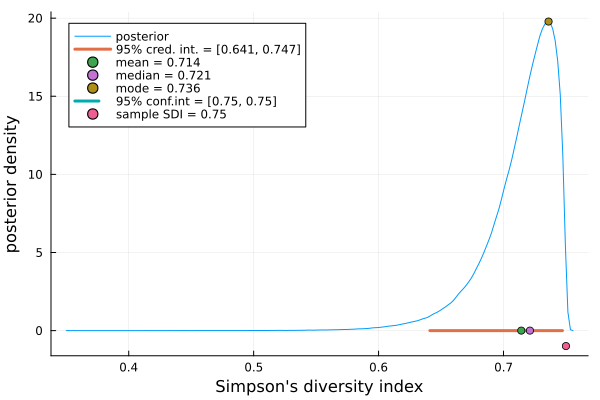

In [27]:
plot_posterior(data = [5, 5, 5, 5])

data = [1, 6]
prior_param = [0, 0]


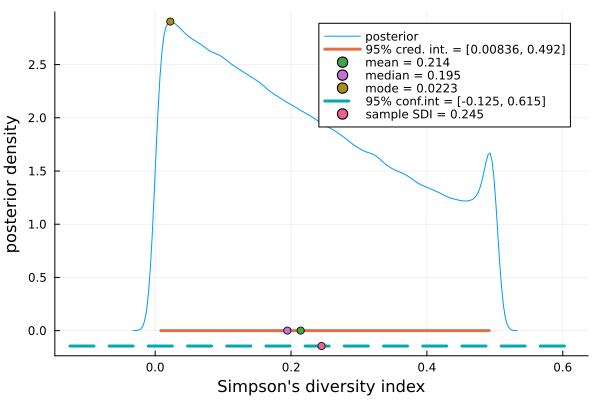

In [28]:
plot_posterior(data = [1, 6])

https://journals.asm.org/doi/10.1128/jcm.39.11.4190-4192.2001

data = [9, 8, 7, 6, 5, 5, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
prior_param = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


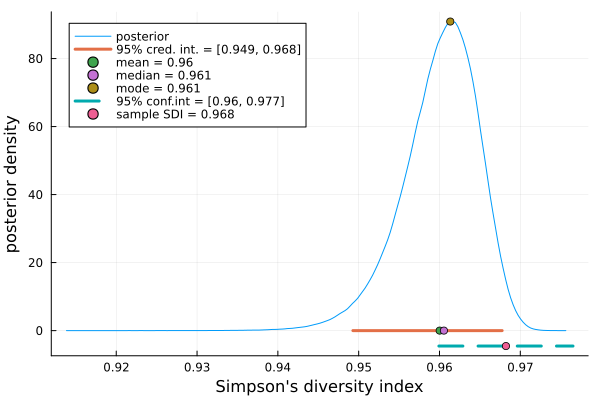

In [30]:
table1 = [9; 8; 7; 6; 5; 5; fill(4, 3); fill(3, 4); fill(2, 9); fill(1, 35)]
plot_posterior(data=table1, legend=:topleft)

data = [37, 5, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
prior_param = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


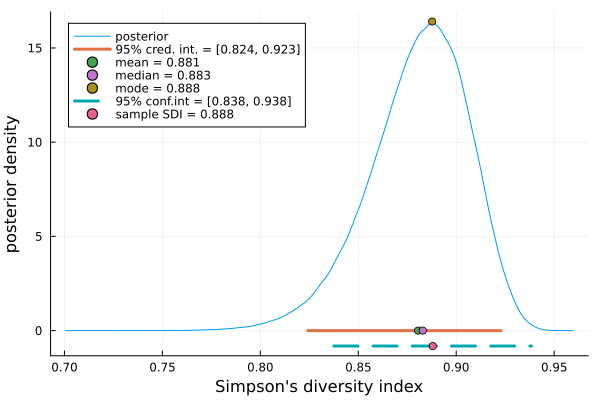

In [31]:
table2 = [37; 5; fill(4, 2); fill(3, 4); fill(2, 8); fill(1, 39)]
plot_posterior(data=table2)

data = [30, 13, 9, 8, 7, 7, 7, 6, 6, 5, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
prior_param = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


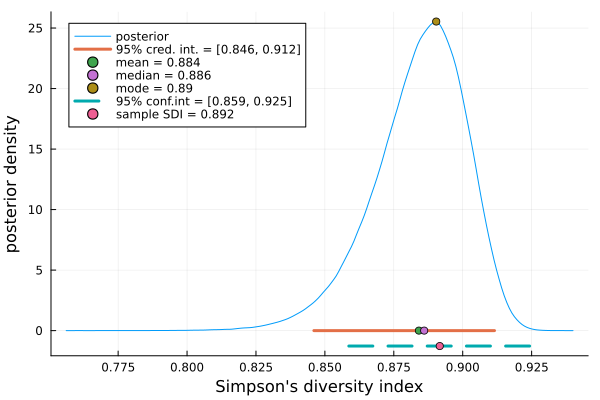

In [32]:
table3 = [30; 13; 9; 8; fill(7, 3); fill(6, 2); 5; fill(2, 3); fill(1, 13)]
plot_posterior(data=table3)

x = table1 = [9, 8, 7, 6, 5, 5, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
d = 0.9 = 0.9
λ = find_zero(f, 0.0) = 1886.4924971748935
ptilde .|> r = [0.0526, 0.0488, 0.0448, 0.0405, 0.0359, 0.0359, 0.0308, 0.0308, 0.0308, 0.0252, 0.0252, 0.0252, 0.0252, 0.0187, 0.0187, 0.0187, 0.0187, 0.0187, 0.0187, 0.0187, 0.0187, 0.0187, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109, 0.0109]
all(ptilde .> 0) = true
sum(ptilde) = 0.9999999999999973
1 - dot(ptilde, ptilde) = 0.9759602805998827
G = 2 * sum((x[i] * log(phat[i] / ptilde[i]) for i = eachindex(x))) = 5.533481720251194
pval = ccdf(Chisq(1), G) = 0.0186559457629175


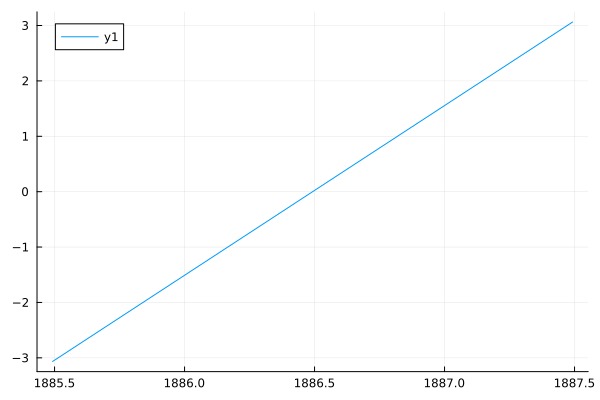

In [168]:
function _eq_of_lambda(λ, x, d)
    r = length(x)
    n = sum(x)
    ν = n - λ*(1 - d)
    2λ - r*ν - sum(√(ν^2 + 4λ*x[i]) for i in eachindex(x))
end

@show x = table1
@show d = 0.9
f(λ) = _eq_of_lambda(λ, x, d)
@show λ = find_zero(f, 0.0)

n = sum(x)
phat = x/n
ν = n - λ*(1 - d)
ptilde = [2x/(-ν+√(ν^2 + 4λ*x)) for x in x]
@show ptilde .|> r
@show all(ptilde .> 0)
@show sum(ptilde)
@show 1 - dot(ptilde, ptilde)
@show G = 2sum(x[i]*log(phat[i]/ptilde[i]) for i in eachindex(x))
@show pval = ccdf(Chisq(1), G)

plot(f, λ-1, λ+1)